<a href="https://colab.research.google.com/github/randy-ar/gcolab/blob/main/Explanatory_Data_Analysis_EPA_Chemical_Data_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px

# Read Data CSV

In [85]:
table_consumer_cleaned = "1Tc_x6HKuURcpj3926fluGtwPyvofEc2Z"
download_url = "https://docs.google.com/uc?export=download&id="

In [86]:
gdown.download(download_url+table_consumer_cleaned, 'df_consumer.csv', quiet=False)

Downloading...
From: https://docs.google.com/uc?export=download&id=1Tc_x6HKuURcpj3926fluGtwPyvofEc2Z
To: /content/df_consumer.csv
100%|██████████| 6.28M/6.28M [00:00<00:00, 38.3MB/s]


'df_consumer.csv'

In [87]:
df_consumer = pd.read_csv('df_consumer.csv')

In [88]:
df_consumer.count()

,0
CHEMICAL ID,24447
CHEMICAL NAME,24447
CHEMICAL ID TYPE,24447
RECYCLED,24447
2019 DOMESTIC PV,24447
2019 IMPORT PV,24447
2019 PV,24447
2018 PV,24447
2017 PV,24447
2016 PV,24447


# EDA

## Nomor 1

### Kepadatan production value pada setiap states

In [44]:
# prompt: i want Choropleth map describe sum 2019 PV in each state
df_state_pv_2019 = df_consumer.groupby('SITE STATE')['2019 PV'].sum().reset_index()

fig = px.choropleth(df_state_pv_2019,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='2019 PV',
                    scope="usa",
                    color_continuous_scale="plasma",
                    title="Sum of PV in each state in 2019")
fig.show()

### Kepadatan pekerja yang terlibat dengan bahan kimia

In [46]:
# prompt: i want Choropleth map describe sum WORKERS in each city

# Aggregate WORKERS by City
df_city_workers = df_consumer.groupby('SITE CITY')['WORKERS MEDIAN'].sum().reset_index()
df_state_workers = df_consumer.groupby('SITE STATE')['WORKERS MEDIAN'].sum().reset_index()

fig = px.choropleth(df_state_workers,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='WORKERS MEDIAN',
                    scope="usa",
                    color_continuous_scale="plasma",
                    title="Sum of Workers in each State")
fig.show()

## Nomor 2

### Bahan kimia yang tidak didaur ulang

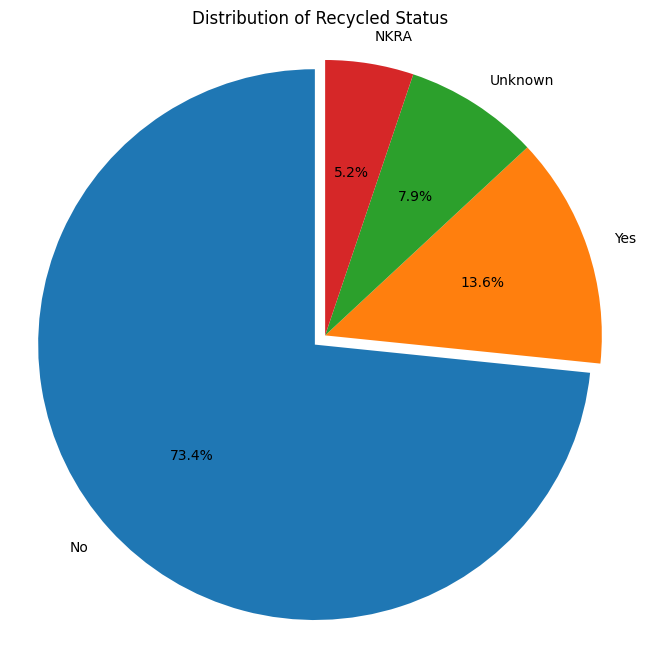

In [89]:
recycled_counts = df_consumer['RECYCLED'].value_counts()

labels = recycled_counts.index
sizes = recycled_counts.values
explode = [0.05 if label == 'No' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recycled Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bahan Kimia yang terdaftar sebagai TSCA

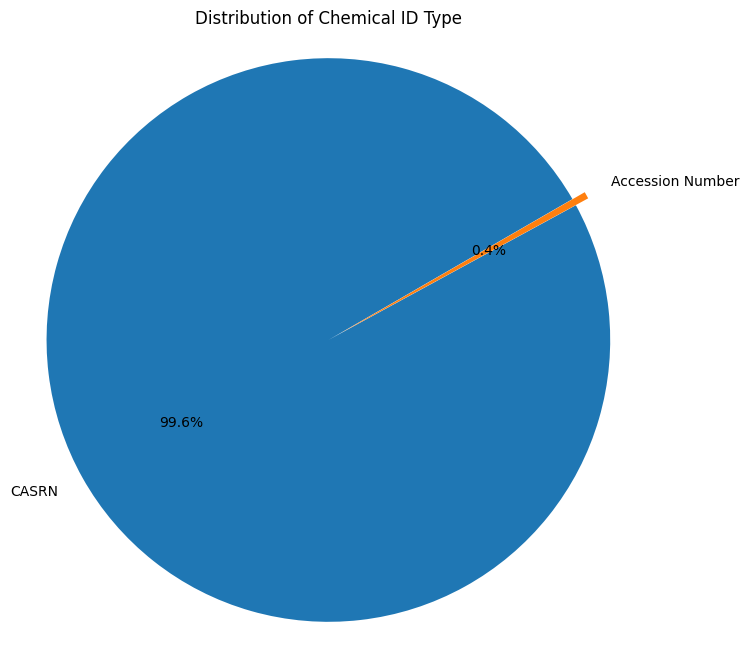

In [90]:
chemical_type_counts = df_consumer['CHEMICAL ID TYPE'].value_counts()

labels = chemical_type_counts.index
sizes = chemical_type_counts.values
explode = [0.05 if label == 'Accession Number' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Chemical ID Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

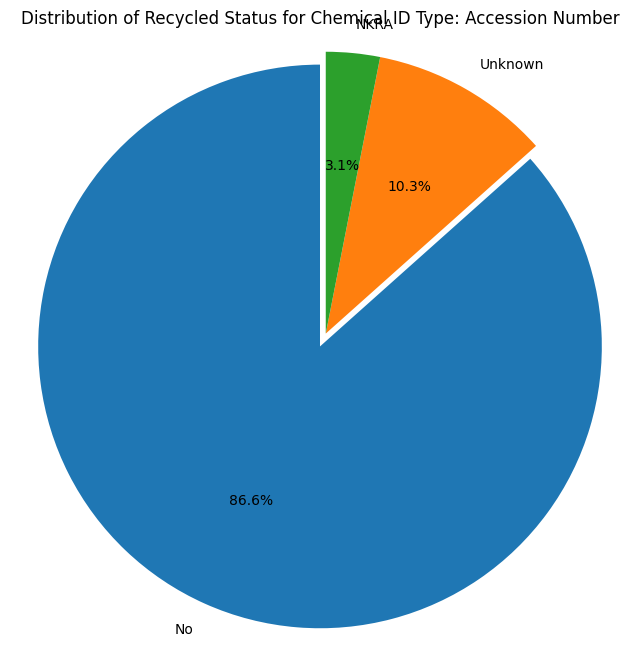

In [91]:
# prompt: show distribution recycled where chemical id type is Accession Number

import matplotlib.pyplot as plt
# Filter the dataframe where 'CHEMICAL ID TYPE' is 'Accession Number'
df_accession_number = df_consumer[df_consumer['CHEMICAL ID TYPE'] == 'Accession Number']

# Get the value counts for the 'RECYCLED' column in the filtered dataframe
recycled_accession_counts = df_accession_number['RECYCLED'].value_counts()

labels_accession = recycled_accession_counts.index
sizes_accession = recycled_accession_counts.values
explode_accession = [0.05 if label == 'No' else 0 for label in labels_accession]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes_accession, explode=explode_accession, labels=labels_accession, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recycled Status for Chemical ID Type: Accession Number')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### TOP 10 Production Value yang tidak di daur ulang

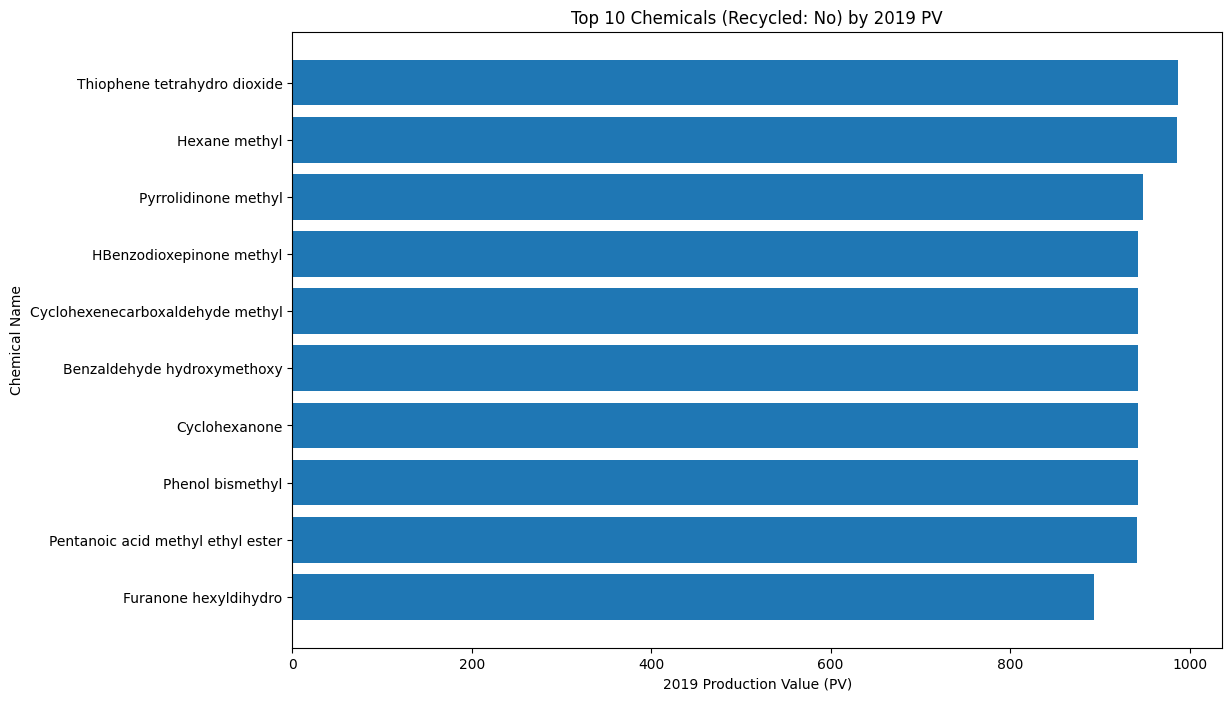

In [95]:
# prompt: find where recycled is no, create top 10 in horizontal bar chart, x axis is 2019 PV. change bar to red is chemical id type is Accession Number

import matplotlib.pyplot as plt
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df_consumer[df_consumer['RECYCLED'] == 'No'].copy()

# Get the top 10 rows based on '2019 PV'
df_top_10_pv_recycled_no = df_recycled_no.nlargest(10, '2019 PV')

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top_10_pv_recycled_no['CHEMICAL NAME SUMMARY'], df_top_10_pv_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('Chemical Name')
plt.title('Top 10 Chemicals (Recycled: No) by 2019 PV')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top

# Change bar color to red if 'CHEMICAL ID TYPE' is 'Accession Number'
for i, row in df_top_10_pv_recycled_no.iterrows():
    if row['CHEMICAL ID TYPE'] == 'Accession Number':
        bars[df_top_10_pv_recycled_no.index.get_loc(i)].set_color('red')

plt.show()

### TOP 10 States yang mempunyai bahan kimia beracun dan tidak di daur ulang

In [96]:
# prompt: find state that have most chemical id type = Accession Number and recycled = no, display it as horizontal chart x axis is count value

# Filter for 'Accession Number' and 'No' in 'RECYCLED'
df_accession_no_recycled = df_consumer[
    (df_consumer['CHEMICAL ID TYPE'] == 'Accession Number') &
    (df_consumer['RECYCLED'] == 'No')
]

# Count the occurrences of each state in the filtered data
state_counts = df_accession_no_recycled['SITE STATE'].value_counts().reset_index()
state_counts.columns = ['SITE STATE', 'Count']

# Sort the states by count in descending order and get the top one
most_common_state = state_counts.iloc[0]

# Create a horizontal bar chart for the states with the most counts
# For this example, we will show the top 10 states for better visualization
top_states = state_counts.head(10)

fig = px.bar(top_states,
             x='Count',
             y='SITE STATE',
             orientation='h',
             title='Top States with Most "Accession Number" and "Not Recycled" Chemicals')
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Order bars by value
fig.show()

## Nomor 3